In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

In [27]:

data = {
    "model": ["SVM"] * 4,
    "dataset": ["Bank", "Gym", "Heart", "Titanic"],
    "Params_Random": [
        {'C': 1.3690,   'gamma': 0.0137},
        {'C': 281.5758, 'gamma': 0.0016},
        {'C': 8.9570,   'gamma': 0.0007},
        {'C': 6.3267,   'gamma': 0.0477}
    ],
    "Brier_score_Base": [0.1893, 0.1687, 0.0998, 0.1712],
    "Brier_Random": [0.1893, 0.1676, 0.1085, 0.1645],
    "Bayes_Brier": [
        0.1876086998390129,
        0.13921661003418287,
        0.13328436116417486,
        0.12212406619348962
    ],
    "Bayes_Params": [
        {'C': 3.6224920477262006, 'gamma': 0.011434496347157295},
        {'C': 1.927147263811625, 'gamma': 0.0158554887437458},
        {'C': 1.2891930984694402, 'gamma': 0.022762273797099865},
        {'C': 21.71388003863076, 'gamma': 0.021649610751383667}
    ]
}

# Tworzenie dwóch ramek
df_random = pd.DataFrame({
    "Model": data["model"],
    "Dataset": data["dataset"],
    "Base" : data["Brier_score_Base"],
    "Params": data["Params_Random"],
    "Brier Score": data["Brier_Random"]
})

df_bayes = pd.DataFrame({
    "Model": data["model"],
    "Dataset": data["dataset"],
    "Base" : data["Brier_score_Base"],
    "Params": data["Bayes_Params"],
    "Brier Score": data["Bayes_Brier"]
})


In [3]:
subset = {"model": ["SVM", "SVM","SVM","SVM"],
         "frac" : [1,0.75,0.5,0.25],
        "params" : [{'C': 4.177031028761628, 'gamma': 0.010251858324347664}, {'C': 3.775008893432737, 'gamma': 0.011281404568596604}, {'C': 1.629812062881743, 'gamma': 0.005950453701289126}, {'C': 2.720733940437542, 'gamma': 0.0038932314792304375}],
        "brier": [0.1876086998390129,0.1896724618482984,0.1934321925950191,0.1956284739244753]}
subset = pd.DataFrame(subset)

In [4]:
subset

,model,frac,params,brier
0,SVM,1.00,"{'C': 4.177031028761628, 'gamma': 0.0102518583...",0.187609
1,SVM,0.75,"{'C': 3.775008893432737, 'gamma': 0.0112814045...",0.189672
2,SVM,0.50,"{'C': 1.629812062881743, 'gamma': 0.0059504537...",0.193432
3,SVM,0.25,"{'C': 2.720733940437542, 'gamma': 0.0038932314...",0.195628


In [6]:
df_bayes.columns


Index(['Model', 'Dataset', 'Params', 'Brier Score'], dtype='object')

In [7]:
best_params = np.where(
    df_bayes['Brier Score'] < df_random['Brier Score'],
    df_bayes['Params'],
    df_random['Params']
)

In [8]:
best_params

array([{'C': 3.6224920477262006, 'gamma': 0.011434496347157295},
       {'C': 1.927147263811625, 'gamma': 0.0158554887437458},
       {'C': 8.957, 'gamma': 0.0007},
       {'C': 21.71388003863076, 'gamma': 0.021649610751383667}],
      dtype=object)

In [9]:
best_params_list = list(best_params)


In [10]:
median_params = pd.DataFrame(best_params_list).median(numeric_only=True).to_dict()


In [11]:
int_params = ['max_depth', 'min_data_in_leaf', 'n_estimators', 'num_leaves', 'min_child_samples']

for param in int_params:
    if param in median_params:
        median_params[param] = int(round(median_params[param]))

print(median_params)

{'C': 6.289746023863101, 'gamma': 0.013644992545451547}


In [12]:
X1 = pd.read_csv("preprocessed_datasets/bank_data.csv")
y1 = pd.read_csv("preprocessed_datasets/bank_target.csv")
X2 = pd.read_csv("preprocessed_datasets/gym_data.csv")
y2 = pd.read_csv("preprocessed_datasets/gym_target.csv")
X3 = pd.read_csv("preprocessed_datasets/heartDisease_data.csv")
y3 = pd.read_csv("preprocessed_datasets/heartDisease_target.csv")
X4 = pd.read_csv("preprocessed_datasets/titanic_data.csv")
y4 = pd.read_csv("preprocessed_datasets/titanic_target.csv")


In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y4)

In [14]:
datasets = [(X1_train, X1_test, y1_train, y1_test),
            (X2_train, X2_test, y2_train, y2_test),
            (X3_train, X3_test, y3_train, y3_test),
            (X4_train, X4_test, y4_train, y4_test)]

In [19]:


results = []
RANDOM_STATE = 42
for i, (X_train, X_test, y_train, y_test) in enumerate(datasets, start=1):
    baseline_model =  make_pipeline(
        StandardScaler(),
        SVC(kernel='rbf', probability=True, random_state=42)
    )
    baseline_model.fit(X_train, y_train)
    y_prob_baseline = baseline_model.predict_proba(X_test)[:, 1]
    baseline_brier = brier_score_loss(y_test, y_prob_baseline)

    model =make_pipeline(
        StandardScaler(), SVC(**median_params,kernel='rbf', probability=True,  random_state=RANDOM_STATE))
    model.fit(X_train, y_train)
    y_prob_new = model.predict_proba(X_test)[:, 1]
    new_brier = brier_score_loss(y_test, y_prob_new)

    results.append({
        'dataset': f'X{i}',
        'baseline_brier': baseline_brier,
        'new_brier': new_brier,
        'improvement': baseline_brier - new_brier
    })

results_df = pd.DataFrame(results)
print(results_df)


  dataset  baseline_brier  new_brier  improvement
0      X1        0.189311   0.187915     0.001396
1      X2        0.168670   0.166969     0.001701
2      X3        0.099818   0.102740    -0.002923
3      X4        0.171162   0.173899    -0.002738


***We can observe almost no improvement or decrement in score***

Mean difference: -0.000641
Median difference: -0.000671
Std of difference: 0.002532
Percentage of configurations better than baseline by > 0.001: 50.0%


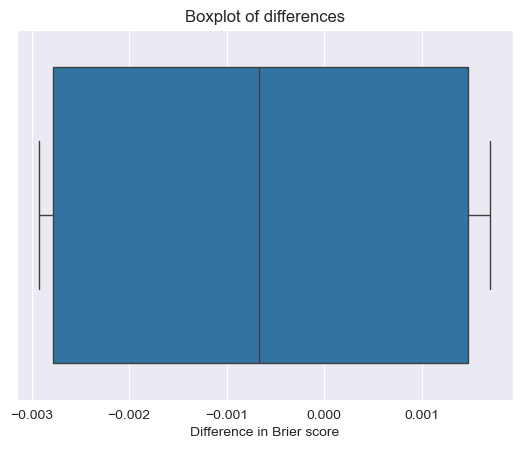

In [21]:
diff = results_df['improvement']

mean_diff = diff.mean()
median_diff = diff.median()
std_diff = diff.std()
epsilon = 0.001 
pct_better = (diff > epsilon).mean() * 100

print(f"Mean difference: {mean_diff:.6f}")
print(f"Median difference: {median_diff:.6f}")
print(f"Std of difference: {std_diff:.6f}")
print(f"Percentage of configurations better than baseline by > {epsilon}: {pct_better:.1f}%")

sns.boxplot(x=diff)
plt.title("Boxplot of differences")
plt.xlabel("Difference in Brier score")
plt.show()

In [23]:
fractions = subset["frac"]
brier_test = subset["brier"]

In [24]:
ref_brier = subset.loc[subset['frac']==1.0, 'brier'].values[0]
subset['delta_brier'] = subset['brier'] - ref_brier
print(subset[['frac', 'delta_brier']])

   frac  delta_brier
0  1.00     0.000000
1  0.75     0.002064
2  0.50     0.005823
3  0.25     0.008020


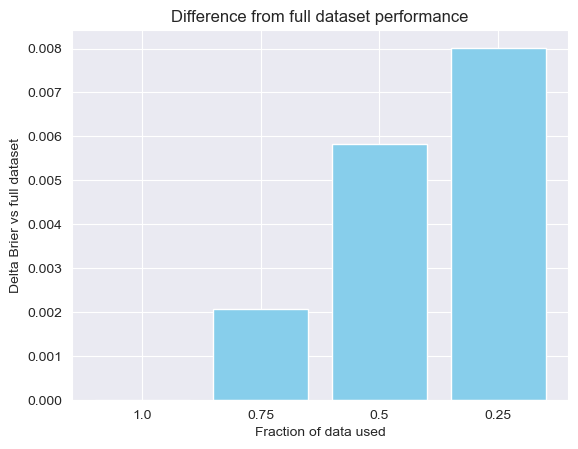

In [25]:
x_labels = subset['frac'].astype(str)

plt.bar(x_labels, subset['delta_brier'], color='skyblue')
plt.xlabel('Fraction of data used')
plt.ylabel('Delta Brier vs full dataset')
plt.title('Difference from full dataset performance')
plt.show()

**On these data less data = worse score. It is something that seems logical**

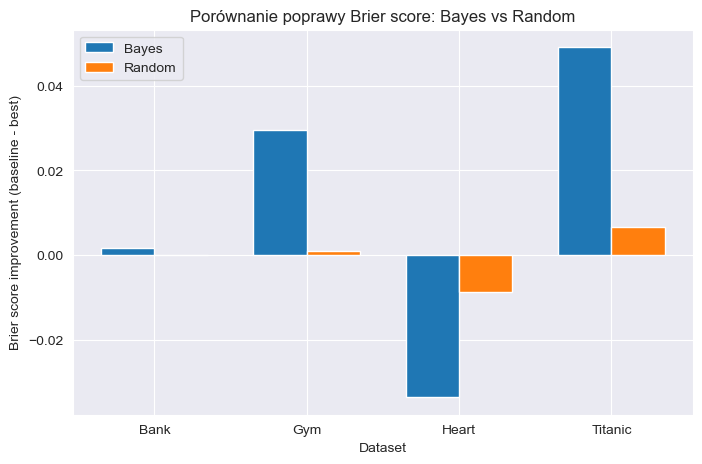

In [29]:
df_bayes['improvement'] = df_bayes['Base'] - df_bayes['Brier Score']
df_random['improvement'] = df_random['Base'] - df_random['Brier Score']

plot_df = pd.DataFrame({
    'dataset': df_bayes['Dataset'],
    'Bayes': df_bayes['improvement'],
    'Random': df_random['improvement']
})

x = np.arange(len(plot_df['dataset']))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width / 2, plot_df['Bayes'], width, label='Bayes')
ax.bar(x + width / 2, plot_df['Random'], width, label='Random')

ax.set_xlabel('Dataset')
ax.set_ylabel('Brier score improvement (baseline - best)')
ax.set_title('Porównanie poprawy Brier score: Bayes vs Random')
ax.set_xticks(x)
ax.set_xticklabels(plot_df['dataset'])
ax.legend()
plt.show()
